In [17]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut

In [18]:
trainX, trainy, testX, testy = ut.create_dataset()

In [19]:
n_input, n_classes = trainX.shape[1], testy.shape[1]

In [31]:
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    model = tf.keras.Sequential()
    model.add(layers.Dense(10,activation='relu', name='layer', input_shape=(n_input,)))
    for i in range(n_layers):
        model.add(layers.Dense(10,activation='relu', name='layer'+str(i), input_shape=(n_input,)))   
    print(i)             
    model.add(layers.Dense(n_classes, activation='softmax', name='layer'+str(i+1)))
    
    for layer in model.layers: 
       print(layer.get_config(), layer.get_weights())
       first_layer_weights = model.layers[0].get_weights()[0]
        # first_layer_biases  = model.layers[0].get_weights()[1]
        # second_layer_weights = model.layers[1].get_weights()[0]
        # second_layer_biases  = model.layers[1].get_weights()[1]
       second_layer_weights = model.layers[9].get_weights()[0]
    
    #print(first_layer_weights)
    # This builds the model for the first time:
    model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainy, epochs=100, verbose=0)  
    loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc


9
{'name': 'layer', 'trainable': True, 'batch_input_shape': (None, 100), 'dtype': 'float32', 'units': 10, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 2.28234112e-01,  2.33176351e-02, -5.21403849e-02,
        -9.03838575e-02,  4.12413478e-02, -2.32347667e-01,
        -3.64688039e-02, -8.47227722e-02, -1.05621114e-01,
         9.68891382e-02],
       [ 1.91624880e-01,  7.80639648e-02, -2.21870214e-01,
        -1.14425421e-02,  1.70486212e-01,  2.36673355e-02,
         7.79687166e-02, -7.52693713e-02, -1.00230262e-01,
        -1.63732693e-01],
       [-9.33780819e-02, -5.39901108e-02, -9.90058631e-02,
        -3.56808454e-02, -2.13784426e-01, -1.80920228e-01,
        -1.37857214e-01, -7.73890465e-02, -4.68357950

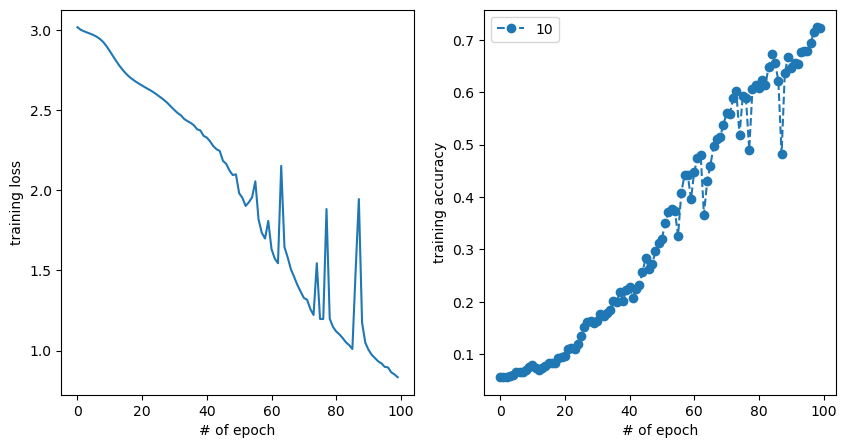

In [33]:
#num_layers = [1,2,3,4,5,10]
num_layers = [10]
plt.figure(figsize=(10,5))
for n_layers in num_layers:
  # evaluate model with a given number of nodes
  history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_layers, result))

  # plot learning curve 
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label=str(n_layers))
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label=str(n_layers), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')

# show the plot

plt.legend()
plt.show()

In [22]:
## Model is capable of learning very well with 1 layer so adding more layers does not improve the performance. 
## Each node has 10 nodes in the hidden layer. 
## Vanishing gradients: how low is low for vanisging gradients??
